<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/europe_stats_analysis/Europe_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#############
###########PREDICT PROGRESS################
#####There are two functions:
#fn_predict_five_year
#fn_predict_three_year


#The first function takes in five year values and calculates a line of best fit
#assuming they represent % availaibility values over a 5 year period. You also need to specify the start year and
#whether you want it to calculate the year availability will reach 100% OR the value for a given future year

#The second function is as above, but only takes three yearly values

#For both functions:
#where input parameter yearOrValueFlag = 0 it will return the year at which availability = 100%
#where  input parameter yearOrValueFlag > 0, it will return the predicted availability percentage at time startyear + yearOrValueFlag
#so if startyear = 2018 and you want to know what the value will be in 2025, set yearOrValueFlag to 7,

def fn_predict_five_year(year1Value, year2Value, year3Value, year4Value, year5Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3,4,5])
  value = np.array([year1Value,year2Value,year3Value,year4Value,year5Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    if thisyear > 0:
      thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value

def fn_predict_three_year(year1Value, year2Value, year3Value, startyear, yearOrValueFlag):
  import math
  # define two arrays to hold the years and the corresponding values
  year = np.array([1,2,3])
  value = np.array([year1Value,year2Value,year3Value])

  # find line equation, beta1 (coefficient) and beta0 (y-intercept)
  beta1, beta0 = np.polyfit(year, value, 1)

  if yearOrValueFlag == 0:
    #find year for a 100% coverage
    y_value = 100
    x_year = 0


    x_year = (y_value - beta0)/beta1

    #the year value should be rounded up
    if thisyear > 0:
      thisyear = math.ceil(x_year) + startyear
    return thisyear
  else:
    #find coverage where year = yearOrValueFlag
    y_value = 0
    x_year = yearOrValueFlag

    y_value = beta0 + beta1*x_year

    return y_value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Import and alias the necessary libraries
import pandas as pd
import os.path
import errno

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#############
# EC broadband data file available from https://digital-strategy.ec.europa.eu/en/library/digital-decade-2024-broadband-coverage-europe-2023
# save the last sheet in the spreadsheet as .csv and name EUROPE_FIBRE.csv
# This path should be set to the location of the file
#############
fileEuropeData = '/content/drive/MyDrive/Colab/EUROPE_FIBRE.csv'
fileEuropeHouseholds = '/content/drive/MyDrive/Colab/EUROPE_FIBRE_HH.csv'

#fileEuropeData = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE.csv'
#fileEuropeHouseholds = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE_HH.csv'
#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropeData) :
    print("Reading Europe fibre data.....")
    dfEurope = pd.read_csv(fileEuropeData)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeData)
print("Europe fibre file data shape:", dfEurope.shape)

if os.path.exists(fileEuropeHouseholds) :
    print("Reading Europe fibre data (households).....")
    dfEuropeHH = pd.read_csv(fileEuropeHouseholds)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeHouseholds)
print("Europe fibre file data (households) shape:", dfEuropeHH.shape)

###DEFINE FUNCTIONS FOR CLEANING THE FILE
#fn_clean_years removed % sign and changes datatype to float
#fn_change_col_name will change any column name in any dataframe


def fn_clean_years(thisdf, thiscol):
  #check column is still a string
  if thisdf[thiscol].dtype == 'object':
    #check for dashes -
    thisdf[thiscol] = thisdf[thiscol].str.replace('-', '')
    #convert the yearly value to a float - first remove the % sign
    thisdf[thiscol] = thisdf[thiscol].str.replace('%', '')#.astype(float)
    #check if there's a comma and remove those
    thisdf[thiscol] = thisdf[thiscol].str.replace(',', '')#.astype(float)
    #check for blanks
    thisdf[thiscol] = thisdf[thiscol].str.replace(' ', '')#.astype(float)
    #finally replace empty strings with None
    thisdf[thiscol] = thisdf[thiscol].replace('', None)
    #now change the datatype of the column
    #thisdf.astype({thiscol: 'float'}).dtypes
    thisdf[thiscol] = thisdf[thiscol].astype(float)
  return thisdf

def fn_change_col_name(thisdf, oldname, newname):
  #change the name of the geography column to URClass
  thisdf.rename(columns={oldname: newname}, inplace=True)
  return thisdf

#clean and prepare data
#we need to rename the Geography level URClass cos it didn't seemto like the space in the name
#then for each of the year columns strip the % sign from the value and change it from a string to a float
dfEuropeClean = fn_change_col_name(dfEurope, 'Geography level', 'URClass')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2023')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2022')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2021')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2020')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2019')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2018')
print(dfEuropeClean.head())

#now do the same for the households data
#in this case, we need to strip a , from the year columns and change it to a float
dfEuropeCleanHH = fn_change_col_name(dfEuropeHH, 'Geography level', 'URClass')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2023')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2022')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2021')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2020')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2019')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2018')
print(dfEuropeCleanHH.head())

europeCols = ['Country','Metric','URClass', 'Unit','2018','2019','2020','2021','2022','2023']
dfEuropeClean = dfEuropeClean[europeCols]
print(dfEuropeClean.head())

europeHHCols = ['Country','Metric','URClass','Unit','2018','2019','2020','2021','2022','2023']
dfEuropeCleanHH = dfEuropeCleanHH[europeCols]
print(dfEuropeCleanHH.head())

#rename year columns in each dataset
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2018', '2018%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2019', '2019%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2020', '2020%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2021', '2021%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2022', '2022%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2023', '2023%')

dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2018', '2018HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2019', '2019HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2020', '2020HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2021', '2021HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2022', '2022HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2023', '2023HH')

##merge the two datasets
colslist = ['Country', 'Metric','URClass']
dfFinal = pd.merge(dfEuropeClean,dfEuropeCleanHH,on=colslist, how='inner')

def fn_filter_by_metric(thisdf, thismetric):
  #return a new dataset which only contains specified metric
  return thisdf.query('Metric == "' + thismetric + '"')

#now run this function to get only those rows where Metric = FTTP
#this will give us all the rows for full fibre availability
dfEuropeCleanFTTP = fn_filter_by_metric(dfFinal, 'FTTP')
dfEuropeCleanFTTP.head()


#drop summary rows so only the countries are left
#dfEuropeCleanFTTPTotalDropEU = dfEuropeCleanFTTPTotal.drop(dfEuropeCleanFTTPTotal[dfEuropeCleanFTTPTotal['Country'] == 'EU27'].index)
#dfEuropeCleanFTTPTotalDropEU = dfEuropeCleanFTTPTotalDropEU.drop(dfEuropeCleanFTTPTotal[dfEuropeCleanFTTPTotal['Country'] == 'EU28'].index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading Europe fibre data.....
Europe fibre file data shape: (1650, 16)
Reading Europe fibre data (households).....
Europe fibre file data (households) shape: (1650, 15)
   Country                        Metric URClass             Unit  \
0  Austria                     Land area   Total       km squared   
1  Austria                    Population   Total              ###   
2  Austria                    Households   Total              ###   
3  Austria   Broadband coverage (>2Mbps)   Total  % of Households   
4  Austria  Broadband coverage (>30Mbps)   Total  % of Households   

           2013          2014          2015          2016          2017  \
0    8387900.0%    8387900.0%    8387900.0%    8387900.0%    8387900.0%   
1  844301800.0%  845186000.0%  850688900.0%  857626100.0%  869007600.0%   
2  367087600.0%  373890627.2%  381326121.0%  385514998.2%  39

<ipython-input-12-940dabacb5a8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdf.rename(columns={oldname: newname}, inplace=True)
<ipython-input-12-940dabacb5a8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdf.rename(columns={oldname: newname}, inplace=True)
<ipython-input-12-940dabacb5a8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdf.rename(columns={oldname: newname}, inplace=True)
<ipython-input-12-940daba

,Country,Metric,URClass,Unit_x,2018%,2019%,2020%,2021%,2022%,2023%,Unit_y,2018HH,2019HH,2020HH,2021HH,2022HH,2023HH
15,Austria,FTTP,Total,% of Households,13.0,13.8,20.5,26.6,36.6,41.0,Households,512932.0,534791.0,805015.0,1054017.0,1463133.0,1652409.0
44,Belgium,FTTP,Total,% of Households,1.4,3.6,6.5,10.1,17.2,25.0,Households,68689.0,174923.0,309472.0,503257.0,861948.0,1204619.0
73,Bulgaria,FTTP,Total,% of Households,54.2,65.2,75.2,81.4,85.6,88.6,Households,1589576.0,1877295.0,2173209.0,2345497.0,2439632.0,2484082.0
102,Croatia,FTTP,Total,% of Households,23.4,31.0,35.6,38.7,53.9,62.1,Households,350771.0,450768.0,506428.0,547711.0,760941.0,891208.0
131,Cyprus,FTTP,Total,% of Households,0.5,10.1,26.2,41.4,60.0,77.1,Households,1526.0,31661.0,81913.0,130178.0,190216.0,246704.0


### Code snippets to predict progress and show data

### show european countries predicted to have less than 50% availability by 2030

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-410e90e4995b>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['FTTP2024'] = vals2024
<ipython-input-13-410e90e4995b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

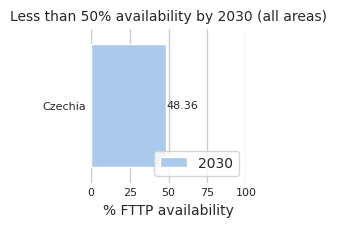

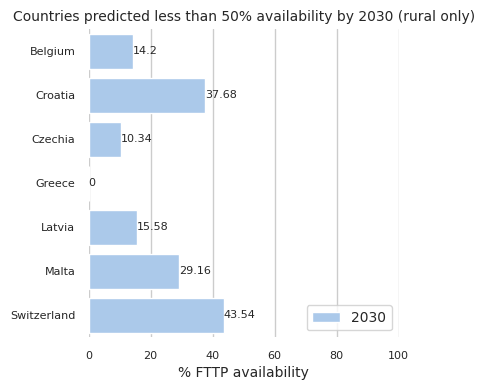

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def fn_filter_by_urclass(thisdf, thisUrclass):
  #return a new dataset which only contains specified URClass
  return thisdf.query('URClass == "' + thisUrclass + '"')


def fn_calc_and_plot(df_final, urclass):

  vals2024= []
  vals2025=[]
  vals2026=[]
  vals100=[]
  vals2027= []
  vals2028=[]
  vals2029=[]
  vals2030=[]
  for _,row in df_final.iterrows():
     thisval2024 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 5)
     vals2024.append(thisval2024)
     thisval2025 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 6)
     vals2025.append(thisval2025)
     thisval2026 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 7)
     vals2026.append(thisval2026)
     thisval2027 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 8)
     vals2027.append(thisval2027)
     thisval2028 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 9)
     vals2028.append(thisval2028)
     thisval2029 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 10)
     vals2029.append(thisval2029)
     thisval2030 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 11)
     vals2030.append(thisval2030)
     #thisval100 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 0)
     #vals100.append(thisval100)


  df_final['FTTP2024'] = vals2024
  df_final['FTTP2025'] = vals2025
  df_final['FTTP2026'] = vals2026
  df_final['FTTP2027'] = vals2027
  df_final['FTTP2028'] = vals2028
  df_final['FTTP2029'] = vals2029
  df_final['FTTP2030'] = vals2030
 # df_final['100% Year'] = vals100


  df_final['FTTP2030'] = df_final['FTTP2030'].astype(float)
  #display(df_final.head(100))
  df_lessthan50=df_final.query('FTTP2030 < 50')


  df_lessthan50.sort_values(['Country','FTTP2030'], ascending=True, inplace=True)

  if urclass == 'Total':

    f, ax = plt.subplots(figsize=(2, 2))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x='FTTP2030', y='Country', label="2030", color="b",
                 data=df_lessthan50 )
    ax.legend(ncol=2, loc="lower right", frameon=True, prop = {'size' : 10})
    ax.set(xlim=(0, 100), ylabel="",
           xlabel="% FTTP availability")
    plt.xlabel('% FTTP availability', fontsize=10)
    plt.ylabel('', fontsize=10)
    ax.bar_label(ax.containers[0], fontsize=8);
    ax.set_title("Less than 50% availability by 2030 (all areas)", fontsize=10)
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_tick_params(labelsize = 8)
    ax.xaxis.set_tick_params(labelsize = 8)

  elif urclass == 'Rural':
    f, ax = plt.subplots(figsize=(4, 4))
    sns.set(style="whitegrid")
    sns.set_color_codes("pastel")
    ax = sns.barplot(x='FTTP2030', y='Country', label="2030", color="b",
                 data=df_lessthan50 )
    ax.legend(ncol=2, loc="lower right", frameon=True,prop = {'size' : 10})
    ax.set(xlim=(0, 100), ylabel="",
           xlabel="% FTTP availability")
    plt.xlabel('% FTTP availability', fontsize=10)
    plt.ylabel('', fontsize=10)
    ax.bar_label(ax.containers[0], fontsize=8);
    ax.set_title("Countries predicted less than 50% availability by 2030 (rural only)", fontsize=10)
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_tick_params(labelsize = 8)
    ax.xaxis.set_tick_params(labelsize = 8)



df_final_total = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')
fn_calc_and_plot(df_final_total, 'Total')

df_final_rural = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Rural')
fn_calc_and_plot(df_final_rural, 'Rural')






## using data above, calculate predicted avail values for each country until 2030


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-75711b9db855>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped['FTTP2024'] = vals2024
<ipython-input-14-75711b9db855>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

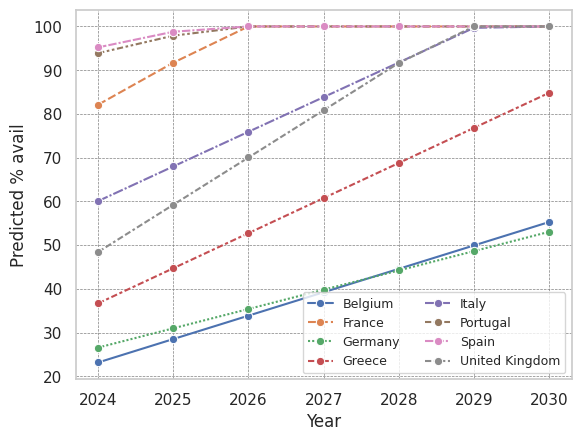

<ipython-input-14-75711b9db855>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2024', 1, regplotData['variable'])
<ipython-input-14-75711b9db855>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2025', 2, regplotData['variable'])
<ipython-input-14-75711b9db855>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

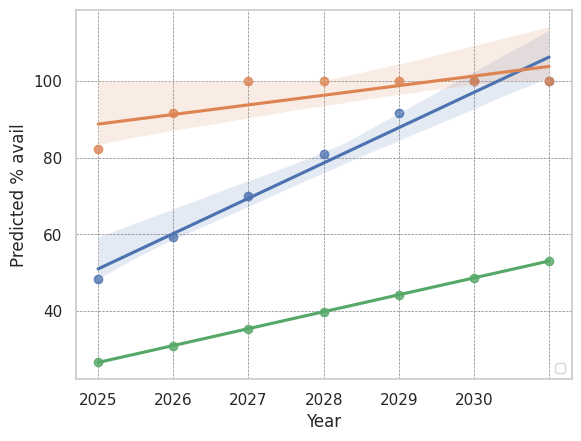

In [ ]:
#####################################################################################
###################################################################################
##using data above, calculate predicted avail values for each constituency until 2030
##
#group by country, then show each countries predicted avail up ti  2030
#df_grouped = df_final.groupby('country', 'FTTP2019'.mean)
df_grouped = df_final_total[['Country', '2023%','2022%','2021%','2020%','2019%']]
#display(df_grouped.head(100))
vals2024= []
vals2025=[]
vals2026=[]
vals2027= []
vals2028=[]
vals2029=[]
vals2030=[]
vals100=[]
for _,row in df_grouped.iterrows():
    thisval2024 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 5)
    vals2024.append(thisval2024)

    thisval2025 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 6)
    vals2025.append(thisval2025)
    thisval2026 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 7)
    vals2026.append(thisval2026)
    thisval2027 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 8)
    vals2027.append(thisval2027)
    thisval2028 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 9)
    vals2028.append(thisval2028)
    thisval2029 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 10)
    vals2029.append(thisval2029)
    thisval2030 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 11)
    vals2030.append(thisval2030)
    #thisval100 = fn_predict_five_year(row['2019%'], row['2020%'], row['2021%'], row['2022%'], row['2023%'], 2019, 0)
    #vals100.append(thisval100)
df_grouped['FTTP2024'] = vals2024
df_grouped['FTTP2025'] = vals2025
df_grouped['FTTP2026'] = vals2026
df_grouped['FTTP2027'] = vals2027
df_grouped['FTTP2028'] = vals2028
df_grouped['FTTP2029'] = vals2029
df_grouped['FTTP2030'] = vals2030

#df_grouped['100% Year'] = vals100
#df_grouped.head()
#drop anything before 2024
df_grouped.drop(['2019%'], axis=1, inplace=True)
df_grouped.drop(['2020%'], axis=1, inplace=True)
df_grouped.drop(['2021%'], axis=1, inplace=True)
df_grouped.drop(['2022%'], axis=1, inplace=True)
df_grouped.drop(['2023%'], axis=1, inplace=True)

percent_cols = ['FTTP2024','FTTP2025',
       'FTTP2026',
       'FTTP2027',
       'FTTP2028','FTTP2029', 'FTTP2030']
meltedData=df_grouped.melt(id_vars=["Country"],value_vars=percent_cols)

meltedData['value'] = np.where(meltedData['value'] > 100, 100, meltedData['value'])
#filter to only return data for United Kingdom, France, Germany, Spain, Italy, Portugal, Belgium and Greece

meltedData = meltedData.query('Country == "United Kingdom" | Country == "France" | Country == "Germany" | Country == "Spain" | Country == "Italy" | Country == "Portugal" | Country == "Greece"| Country == "Belgium"')
#display(meltedData.head(100))
#meltedData.plot(x='variable',y='value')
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.lineplot(x='variable', y='value', hue='Country', style='Country',marker = 'o', color='b',# deep, muted, bright, pastel, dark, colorblind
             data=meltedData, )
ax.legend(ncol=2, loc="lower right", frameon=True,prop = {'size' : 9})
ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('Year')
plt.ylabel('Predicted % avail')
plt.show()

#try to clean data so we can use regplot
regplotData = meltedData.query('Country == "United Kingdom"')
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2024', 1, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2025', 2, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2026', 3, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2027', 4, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2028', 5, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2029', 6, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2030', 7, regplotData['variable'])
regplotData['variable'] = regplotData['variable'].astype(float)
ax = sns.regplot(x='variable', y='value', data=regplotData)
regplotData = meltedData.query('Country == "France"')
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2024', 1, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2025', 2, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2026', 3, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2027', 4, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2028', 5, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2029', 6, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2030', 7, regplotData['variable'])
regplotData['variable'] = regplotData['variable'].astype(float)
ax = sns.regplot(x='variable', y='value', data=regplotData)
regplotData = meltedData.query('Country == "Germany"')
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2024', 1, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2025', 2, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2026', 3, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2027', 4, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2028', 5, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2029', 6, regplotData['variable'])
regplotData['variable'] = np.where(regplotData['variable'] == 'FTTP2030', 7, regplotData['variable'])
regplotData['variable'] = regplotData['variable'].astype(float)

ax = sns.regplot(x='variable', y='value', data=regplotData)
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax.legend(ncol=2, loc="lower right", frameon=True,prop = {'size' : 9})
ax.set_xticklabels(['2024','2025','2026','2027','2028','2029','2030'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel('Year')
plt.ylabel('Predicted % avail')
plt.show()
plt.show()




## using data above, create map as of 2030

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Reading Europe geojson data.....


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


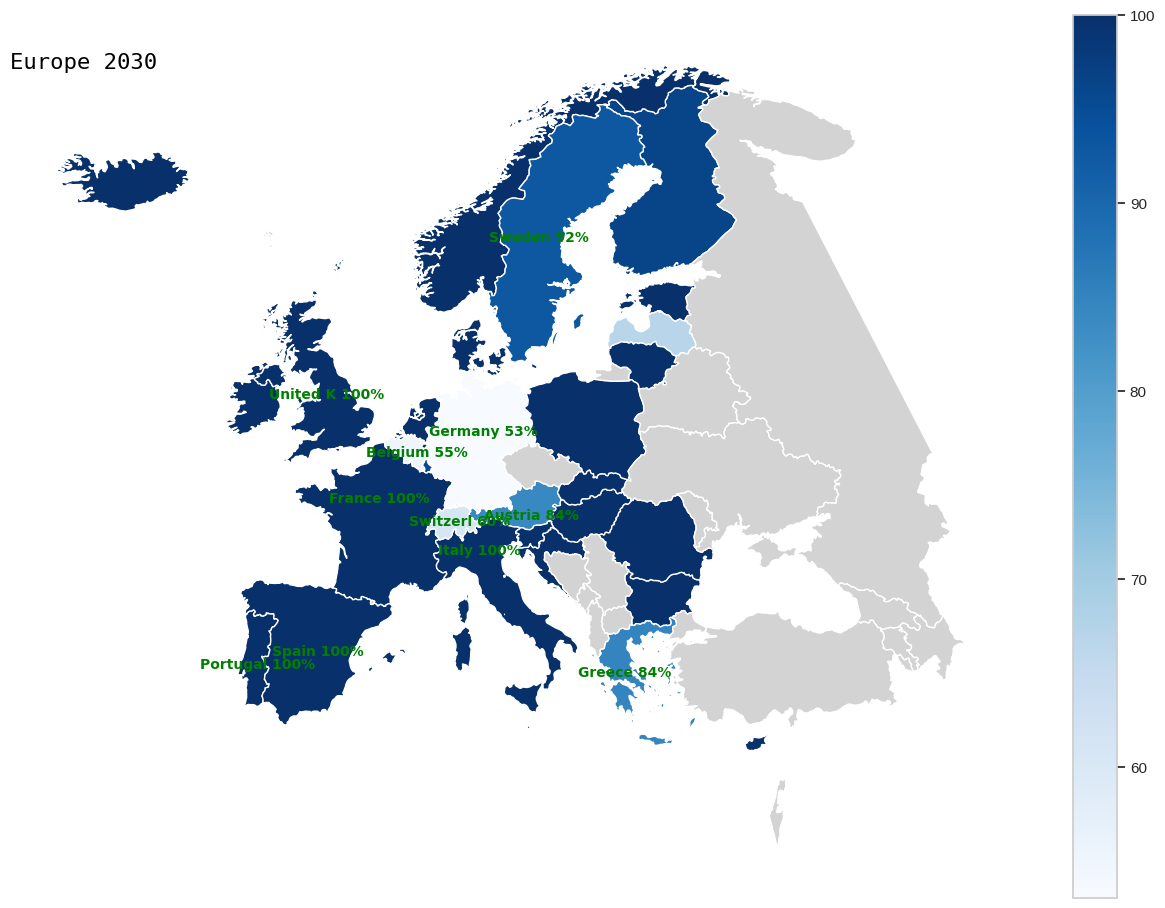

In [ ]:
##################################################
##Code to predict data for europe til 2030 and
##load result for 2030 as a map
#############################################

import geopandas as gpd
#need a new function to filter by Unit

def fn_filter_by_unit(thisdf, thisUnit):
  #return a new dataset which only contains specified unit
  return thisdf.query('Unit_x == "' + thisUnit + '"')


#now combine with geojson file to display as a map
#load the geojson file first
fileEuropegeojson = '/content/drive/MyDrive/Colab/europe.geojson'

#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropegeojson) :
    print("Reading Europe geojson data.....")
    europe = gpd.read_file(fileEuropegeojson)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropegeojson)



#add in FTTP values

europe_cleaned = europe[['NAME', 'geometry']]
df_europe_with_percent_geo_total = europe_cleaned.merge(df_final_total, left_on='NAME', right_on='Country', how='left')
#df_europe_with_percent_geo_total['2023%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2022%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2021%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2020%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2019%'] = df_europe_with_percent_geo_total['2019%'].replace(np.nan, 0)


plotdf = df_europe_with_percent_geo_total[['NAME', 'FTTP2030' ,'geometry']]
plotdf['FTTP2030'] = np.where(plotdf['FTTP2030'] > 100, 100, plotdf['FTTP2030'])

def fn_plot_graph(thisdf, thisyear):

  fig, ax = plt.subplots(1, 1)
  missing_kwds = dict(color='lightgrey', label='No Data')
  thisdf.plot(column=thisyear, cmap='Blues', ax=ax, legend='full',missing_kwds=missing_kwds)

  # compute centroids for annotations
  data_projected = plotdf.to_crs(epsg=3035)
  data_projected['centroid'] = data_projected.geometry.centroid
  plotdf['centroid'] = data_projected['centroid'].to_crs(plotdf.crs)
  countries_to_annotate = ['France', 'Italy', 'Portugal',
                           'Greece', 'Belgium', 'Austria',
                           'United Kingdom', 'Spain', 'Germany', 'Switzerland', 'Sweden']

  adjustments = {
    'France': (-1, 1),
     'Italy': (-2.4, 2),
     'Portugal': (-0.5, -1),
     'Greece': (-1.2, -0.8),
     'Belgium': (0, -0.7),
     'Austria': (0, -1),
     'United Kingdom': (0, -1),
     'Spain': (0, -1),
     'Germany': (-0.2, 0),
    'Switzerland' : (0,-0.5),
    'Sweden' : (-1.5, -1)
  }
  # annotate countries

  for country in countries_to_annotate:

      # get centroid
    centroid = plotdf.loc[plotdf['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]

    # get corrections
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get rate and annotate
    rate = plotdf.loc[plotdf['NAME'] == country, 'FTTP2030'].values[0]
    rate = int(rate)
    ax.annotate(f'{country[:8]} {rate}%', (x, y), textcoords="offset points", xytext=(5, 5),
                ha='center', fontsize=10, fontweight='bold', fontfamily='DejaVu Sans', color='green')

  # display the plot
  plt.tight_layout()

  fig.set_size_inches(14,10)
  plt.style.use('seaborn-v0_8-whitegrid')
  font = {'family':'monospace','color':'black','size':16}
  ax.set_title('Europe 2030', fontdict = font,pad=-30, loc='left')
  plt.axis('off')
  plt.axis('off')
  plt.show()


fn_plot_graph(plotdf, 'FTTP2030')

The function below draws a map in the same way as above but then adds a bar chart inside the figure. The bar chart groups the availability data showing percentages of countries which have availability in a certain range

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


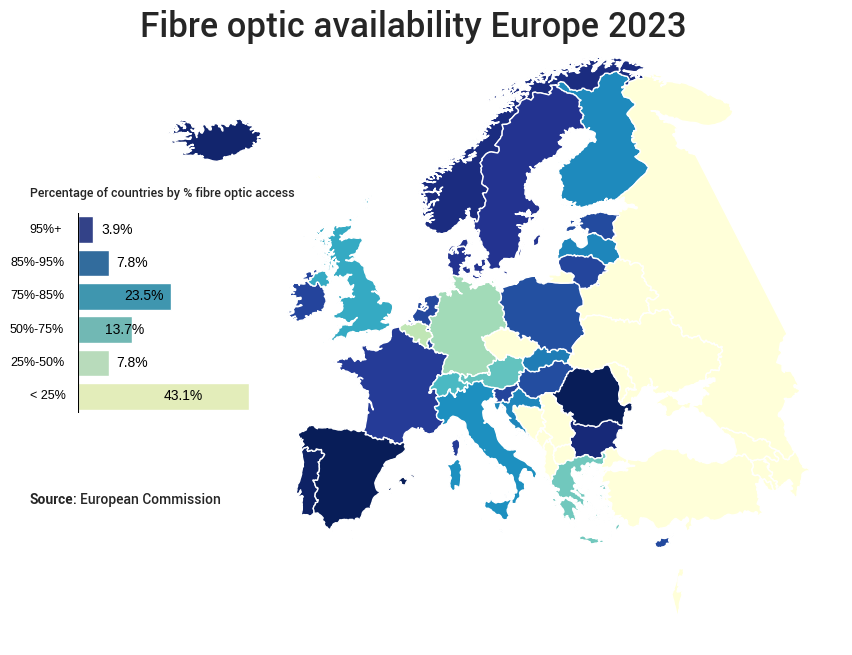

In [ ]:
!pip install pypalettes
!pip install highlight_text
!pip install pyfonts

def fn_plot_map_and_barchart(thisdf, thisyear):
  from pypalettes import load_cmap
  from highlight_text import fig_text, ax_text
  from pyfonts import load_font

  palette_name = "YlGnBu"
  cmap = load_cmap(palette_name, cmap_type="continuous")

  fig, ax = plt.subplots(1, 1)

  #countries on the map for which we have no data sould be coloured light grey
  missing_kwds = dict(color='lightgrey', label='No Data')
  #use the year specified in the input parameter
  thisdf.plot(column=thisyear, cmap=cmap, ax=ax, missing_kwds=missing_kwds)

  fig.set_size_inches(12,8)
  plt.style.use('seaborn-v0_8-whitegrid')
  #font = {'family':'monospace','color':'black','size':16}
 # ax.set_title('Europe 2023', fontdict = font,pad=-30, loc='left')
  plt.axis('off')
  plt.axis('off')

  #create the grouped data for the bar chart/legend
  thisdf.loc[thisdf['2023%'].between(0, 25), 'percent_range'] = '< 25%'
  thisdf.loc[thisdf['2023%'].between(26, 49.9), 'percent_range'] = '25%-50%'
  thisdf.loc[thisdf['2023%'].between(50, 74.9), 'percent_range'] = '50%-75%'
  thisdf.loc[thisdf['2023%'].between(75, 84.9), 'percent_range'] = '75%-85%'
  thisdf.loc[thisdf['2023%'].between(85, 94.9), 'percent_range'] = '85%-95%'
  thisdf.loc[thisdf['2023%'].between(95, 100), 'percent_range'] = '95%+'

  #need this extra column so we can sort the data correctly
  thisdf.loc[thisdf['2023%'].between(0, 25), 'sortvalue'] = 1
  thisdf.loc[thisdf['2023%'].between(26, 49.9), 'sortvalue'] = 2
  thisdf.loc[thisdf['2023%'].between(50, 74.9), 'sortvalue'] = 3
  thisdf.loc[thisdf['2023%'].between(75, 94.9), 'sortvalue'] = 4
  thisdf.loc[thisdf['2023%'].between(85, 94.9), 'sortvalue'] = 5
  thisdf.loc[thisdf['2023%'].between(95, 100), 'sortvalue'] = 6

  grouped_data_barchart = thisdf.groupby(['percent_range', 'sortvalue'])[['NAME']].count()#.reset_index
  grouped_data_barchart.rename(columns={'NAME': 'count'}, inplace=True)
  grouped_data_barchart['total_countries'] = grouped_data_barchart['count'].sum()
  #calc what percentage of countries in each group
  grouped_data_barchart['percentage'] = (grouped_data_barchart['count'] / grouped_data_barchart['total_countries']) * 100
  #add a label for the bar chart
  grouped_data_barchart['label'] = grouped_data_barchart['percentage'].apply(lambda x: '{:.1f}%'.format(x))
  #sort it so its running from 0 - 100
  grouped_data_barchart.sort_values(by=['sortvalue'], inplace=True)
  #reset the index so its in the same order
  grouped_data_barchart.reset_index(inplace=True)

  #where fo we want the barchart?
  mini_ax = ax.inset_axes(bounds=(0.17, 0.40, 0.15, 0.25), transform=fig.transFigure)
  mini_ax.axis("off")
  #plot it
  sns.barplot(
      data=grouped_data_barchart,
      x="percentage",
      y="percent_range",
      palette=palette_name,
      ax=mini_ax,
      hue="percent_range",
      legend=False,
  )
  mini_ax.axvline(x=0, color="black")
  mini_ax.invert_yaxis()

  #add the labels
  for index, row in grouped_data_barchart.iterrows():
    x_pos = row["percentage"]/2 if row["percentage"] > 12 else row["percentage"] + 2
    y_pos = index
    color = "black"
    x_pos2 = -12 if len(row['percent_range']) < 6 else -17
    mini_ax.text(x_pos, y_pos, row["label"], color=color, size=10, va="center")
    mini_ax.text(x_pos2, y_pos, row['percent_range'], color="black", size=9, va="center")

  #load some fancy fonts - not really necessary
  font = load_font(
      "https://github.com/akella/wb/blob/master/css/fonts/Roboto-Medium.otf?raw=true"
  )
  boldfont = load_font(
      "https://github.com/akella/wb/blob/master/css/fonts/Roboto-Bold.otf?raw=true"
  )

  #add a title and a smaller title for the bar chart
  fig.text(
      x=0.45, y=0.87, s="Fibre optic availability Europe 2023", ha="center", size=25, font=font
  )
  fig.text(x=0.13, y=0.67, s="Percentage of countries by % fibre optic access", size=9, font=font)
  #text to recognise the source
  fig_text(
      x=0.13,
      y=0.30,
      s="<Source>: European Commission",
      size=10,
      font=font,
      highlight_textprops=[{"font": boldfont}],
  )

  #lets see it
  plt.show()

#this time we'll do it for 2023
plotdf = df_europe_with_percent_geo_total[['NAME', '2023%' ,'geometry']]

fn_plot_map_and_barchart(plotdf, '2023%')